# Task-4 Decision Tree Classifier

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the data
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
#check missing values if any
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

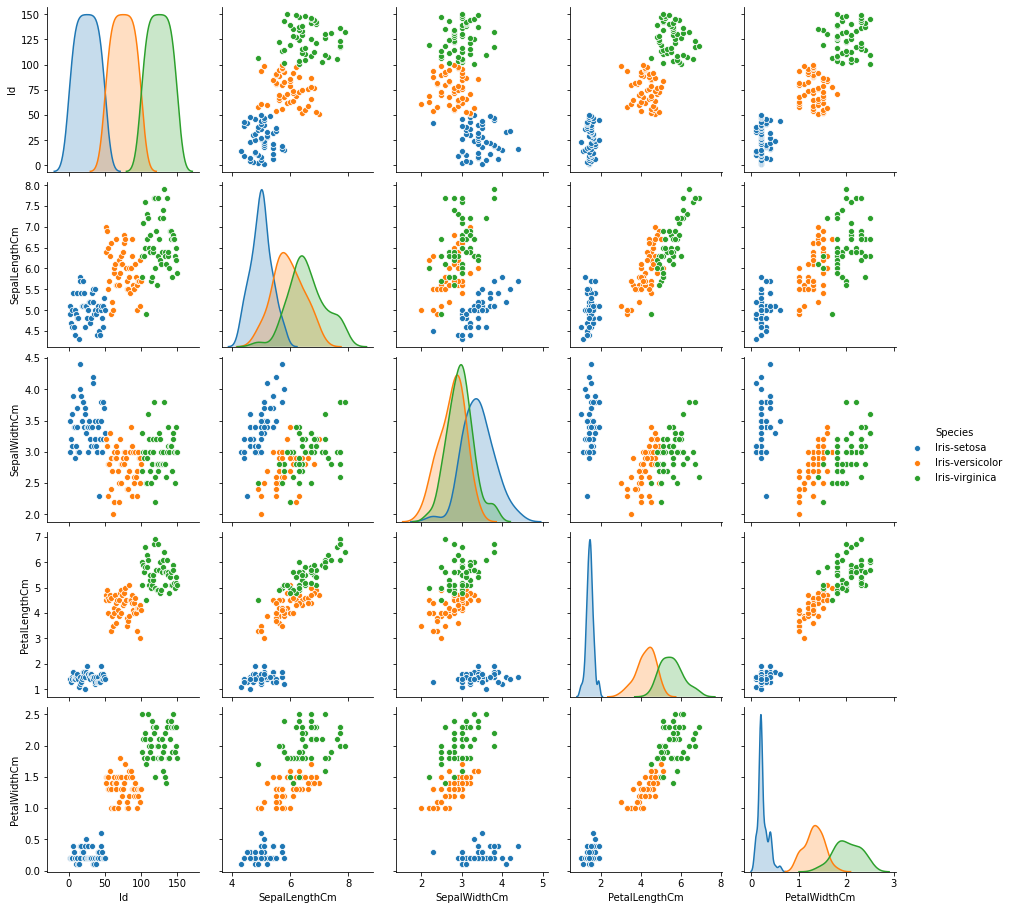

In [9]:
sns.pairplot(df,hue='Species')

In [10]:
X=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [11]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dr=DecisionTreeClassifier()

In [13]:
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
pred=dr.predict(X_test)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
print('accuracy:',accuracy_score(y_test,pred))

accuracy: 0.9666666666666667


In [22]:
df1 = pd.DataFrame({'actual':y_test,'predicted':pred})
df1.head(10)

,actual,predicted
15,Iris-setosa,Iris-setosa
31,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
42,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
93,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
129,Iris-virginica,Iris-versicolor
43,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa


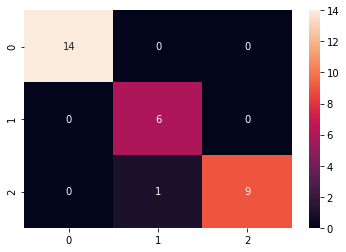

In [23]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

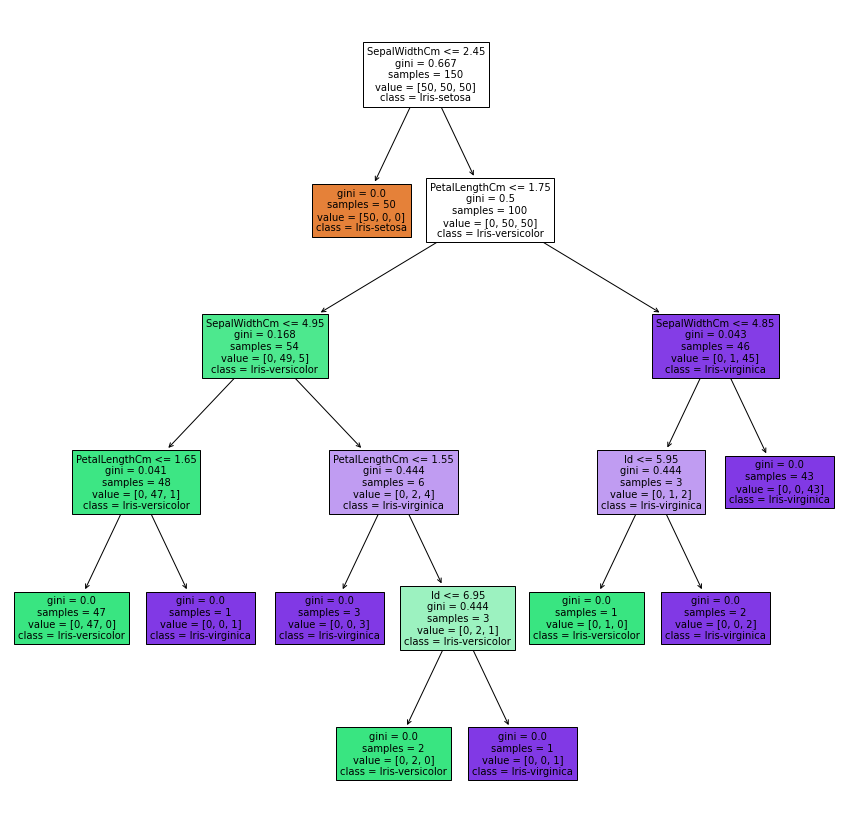

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dr,feature_names=df.columns,class_names=df['Species'].unique(),filled=True)
plt.show()